## Problema de regresion con Morpho-Mnist

### Imports y dataset 

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from IPython.display import display, HTML
from scipy.ndimage import shift
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.layers import Dense, Flatten ,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD,Adam,RMSprop,Adamax,Nadam
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import sys
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [3]:
from tensorflow.keras.datasets import mnist
import pandas as pd
(x_train, y_train) , (x_test, y_test) = mnist.load_data() 
train_morpho = pd.read_csv("/content/drive/MyDrive/Facultad - Enrique Irigoyen/Redes Neuronales/TP1-RN/morpho/train-morpho.csv")
test_morpho = pd.read_csv("/content/drive/MyDrive/Facultad - Enrique Irigoyen/Redes Neuronales/TP1-RN/morpho/t10k-morpho.csv")


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Get the unique categories
unique_categories = np.unique(y_train)

# Create a dictionary to store the datasets
datasets = {}
indexes  = {}
# Split the images into separate datasets based on categories
for category in unique_categories:
    # Find the indices of images belonging to the current category
    indices = np.where(y_train == category)[0]
    indexes[category] = indices
    # Extract the images for the current category
    category_images = x_train[indices]
    
    # Add the category images to the datasets dictionary
    datasets[category] = category_images

datasets.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### EDA

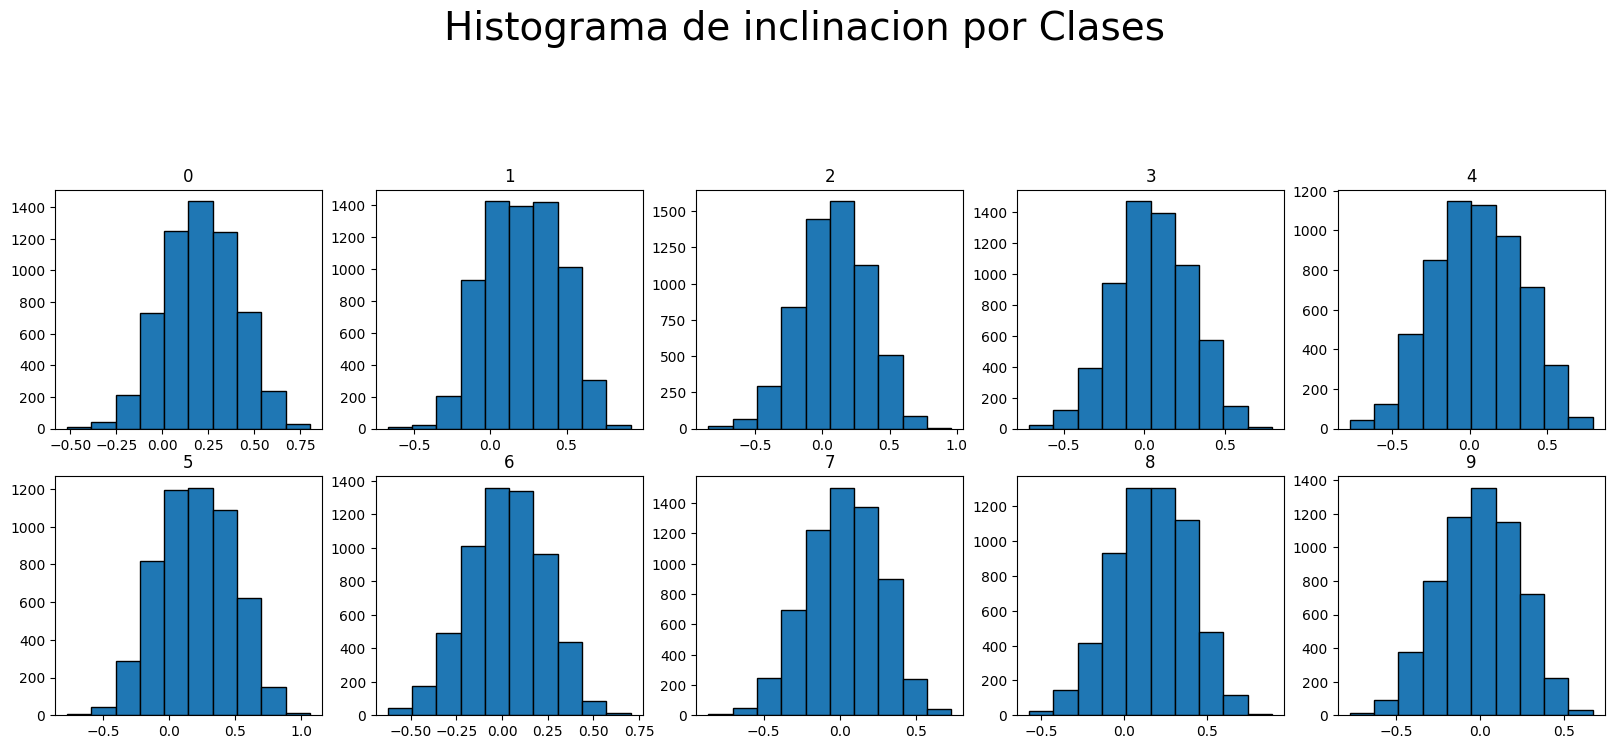

In [5]:
slants_train = np.array(train_morpho['slant']) 
class_names = ['0', '1', '2', '3', '4', 
               '5', '6', '7', '8', '9']
plt.figure(figsize=(20, 18))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.hist(slants_train[indexes[i]], bins=10, edgecolor='black',align='mid')
    plt.title(class_names[i])
plt.suptitle("Histograma de inclinacion por Clases",fontsize = 28)
plt.show()


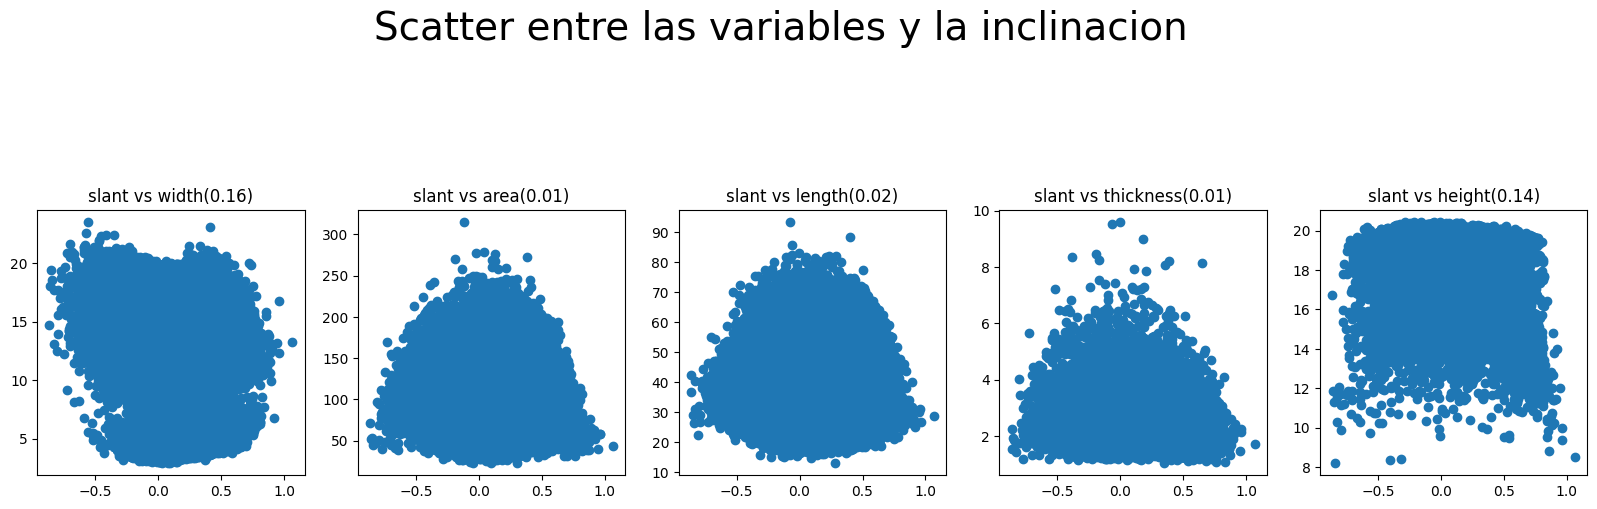

In [6]:
slant_train = np.array(train_morpho['slant']) 
width_train = np.array(train_morpho['width']) 
area_train = np.array(train_morpho['area']) 
length_train =np.array(train_morpho['length']) 
thick_train =np.array(train_morpho['thickness']) 
height_train =np.array(train_morpho['height']) 
variables = ['slant vs width'  , 'slant vs area' ,'slant vs length','slant vs thickness','slant vs height' ]
train_metadata = [slant_train,width_train,area_train,length_train,thick_train,height_train]

slants_test = np.array(test_morpho['slant'])
width_test = np.array(test_morpho['width'])  


corrcoefs = []
corrcoefs.append(abs(np.corrcoef(slant_train,width_train)[0,1]))
corrcoefs.append(abs(np.corrcoef(slant_train,area_train)[0,1]))
corrcoefs.append(abs(np.corrcoef(slant_train,length_train)[0,1]))
corrcoefs.append(abs(np.corrcoef(slant_train,thick_train)[0,1]))
corrcoefs.append(abs(np.corrcoef(slant_train,height_train)[0,1]))


plt.figure(figsize=(20, 20))
for i in [1,2,3,4,5]:
    plt.subplot(5, 5, i)
    plt.grid(False)
    plt.scatter( train_metadata[0],train_metadata[i])
    plt.title(variables[i-1] +"("+str(round(corrcoefs[i-1],2))+")")
plt.suptitle("Scatter entre las variables y la inclinacion ",fontsize = 28)
plt.show()


Debido a que la correlacion mas alta se da entre la inclinacion y el width, usaremos este parametro para el punto c donde se pide añadir una variable a la imagen para predecir la inclinacion.

### Predictor de inclinacion con la imagen

In [ ]:

model =  Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(300, activation='relu'))
model.add(Dense(1, name= 'output'))

model.summary()
model.compile(loss = 'mean_squared_error', optimizer='adam' ,metrics='mae' )




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 1024)              803840    
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 300)               307500    
                                                                 
 output (Dense)              (None, 1)                 301       
                                                      

In [ ]:
escb = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
)

history1 = model.fit(x= x_train, y = slants_train,validation_data=(x_test,slants_test), batch_size = 512, epochs=200,callbacks=[escb,])

Epoch 1/200
118/118 [==============================] - 15s 122ms/step - loss: 0.3234 - mae: 0.2685 - val_loss: 0.0142 - val_mae: 0.0778
Epoch 2/200
118/118 [==============================] - 14s 119ms/step - loss: 0.0126 - mae: 0.0825 - val_loss: 0.0091 - val_mae: 0.0611
Epoch 3/200
118/118 [==============================] - 12s 102ms/step - loss: 0.0080 - mae: 0.0657 - val_loss: 0.0053 - val_mae: 0.0482
Epoch 4/200
118/118 [==============================] - 12s 101ms/step - loss: 0.0058 - mae: 0.0557 - val_loss: 0.0054 - val_mae: 0.0383
Epoch 5/200
118/118 [==============================] - 12s 99ms/step - loss: 0.0045 - mae: 0.0489 - val_loss: 0.0035 - val_mae: 0.0363
Epoch 6/200
118/118 [==============================] - 10s 88ms/step - loss: 0.0037 - mae: 0.0440 - val_loss: 0.0042 - val_mae: 0.0305
Epoch 7/200
118/118 [==============================] - 12s 102ms/step - loss: 0.0029 - mae: 0.0398 - val_loss: 0.0033 - val_mae: 0.0279
Epoch 8/200
118/118 [=============================

Con esta primera red, se logro un mae en validacion de 0.0068. Ahora , utilizando embeddings del label al que pertenece la imagen y tambien utilizando el width veremos si podemos mejorarlo. 

### Predictor de inclinacion con imagen y label

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Flatten,Embedding,Concatenate,Dense,BatchNormalization,Dropout

In [ ]:
entrada_img = Input(shape=(28,28) , name="Entrada_imagen")
entrada_class= Input(shape=(1,), name="Entrada_label")
emb = Embedding(10,2,input_length=1,name="Capa_Embedding")(entrada_class) ##(cantidad de clases, num de embedding, input length)
flat= Flatten(name="Flatten_de_imagen")(entrada_img)
flat_emb = Flatten(name="Flatten_del_vector_emb")(emb)
bnflat = BatchNormalization()(flat)
concat = Concatenate(name="Concatenate")([bnflat,flat_emb])
x1=Dense(1024,activation = 'relu',name="Primer_capa_densa")(concat)
dp2 = Dropout(0.3)(x1)
x2=Dense(300,activation = 'relu',name="Segunda_capa_densa")(dp2)
x3 = Dense(1, name= 'output')(x2)
model2 = Model(inputs = [entrada_img,entrada_class] , outputs = x3)
model2.summary()
model2.compile(loss = 'mean_squared_error', optimizer='adam' ,metrics='mae' )





Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Entrada_imagen (InputLayer)    [(None, 28, 28)]     0           []                               
                                                                                                  
 Entrada_label (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 Flatten_de_imagen (Flatten)    (None, 784)          0           ['Entrada_imagen[0][0]']         
                                                                                                  
 Capa_Embedding (Embedding)     (None, 1, 2)         20          ['Entrada_label[0][0]']          
                                                                                            

In [ ]:
escb = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
)
history2 = model2.fit(x= [x_train,y_train], y = slants_train,validation_data=([x_test ,y_test],slants_test), batch_size = 512, epochs=200,callbacks=[escb,])

Epoch 1/200
118/118 [==============================] - 13s 95ms/step - loss: 0.3590 - mae: 0.2819 - val_loss: 0.0128 - val_mae: 0.0725
Epoch 2/200
118/118 [==============================] - 11s 96ms/step - loss: 0.0130 - mae: 0.0825 - val_loss: 0.0071 - val_mae: 0.0611
Epoch 3/200
118/118 [==============================] - 12s 104ms/step - loss: 0.0081 - mae: 0.0660 - val_loss: 0.0085 - val_mae: 0.0535
Epoch 4/200
118/118 [==============================] - 14s 122ms/step - loss: 0.0059 - mae: 0.0564 - val_loss: 0.0053 - val_mae: 0.0455
Epoch 5/200
118/118 [==============================] - 12s 105ms/step - loss: 0.0046 - mae: 0.0496 - val_loss: 0.0040 - val_mae: 0.0385
Epoch 6/200
118/118 [==============================] - 11s 93ms/step - loss: 0.0037 - mae: 0.0445 - val_loss: 0.0029 - val_mae: 0.0323
Epoch 7/200
118/118 [==============================] - 12s 97ms/step - loss: 0.0031 - mae: 0.0405 - val_loss: 0.0023 - val_mae: 0.0302
Epoch 8/200
118/118 [==============================]

Como vemos, en el caso del embedding la mejora no se ve ya que el mejor valor es de mae = 0.0069 , por lo que el resultado es practicamente el mismo.


### Predictor de inclinacion con imagen y variable elegida(width)

In [7]:
x_train_flat=x_train.reshape(-1,784)
x_test_flat=x_test.reshape(-1,784)
x_train_flat_width = np.append(x_train_flat,width_train.reshape(-1,1),axis = 1)
x_test_flat_width = np.append(x_test_flat,width_test.reshape(-1,1),axis = 1)


In [8]:
model3 =  Sequential()
model3.add(Flatten(input_shape=(785,1)))
model3.add(BatchNormalization())
model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(300, activation='relu'))
model3.add(Dense(1, name= 'output'))

model3.summary()
model3.compile(loss = 'mean_squared_error', optimizer='adam' ,metrics='mae' )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 785)               0         
                                                                 
 batch_normalization (BatchN  (None, 785)              3140      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1024)              804864    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 300)               307500    
                                                                 
 output (Dense)              (None, 1)                 301       
                                                        

In [9]:
escb = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
)
history3 = model3.fit(x= x_train_flat_width, y = slants_train,validation_data=(x_test_flat_width,slants_test), batch_size = 512, epochs=200,callbacks=[escb,])

Epoch 1/200
118/118 [==============================] - 17s 119ms/step - loss: 0.3207 - mae: 0.2714 - val_loss: 0.0149 - val_mae: 0.0755
Epoch 2/200
118/118 [==============================] - 11s 96ms/step - loss: 0.0143 - mae: 0.0873 - val_loss: 0.0079 - val_mae: 0.0560
Epoch 3/200
118/118 [==============================] - 12s 100ms/step - loss: 0.0090 - mae: 0.0693 - val_loss: 0.0068 - val_mae: 0.0436
Epoch 4/200
118/118 [==============================] - 12s 97ms/step - loss: 0.0062 - mae: 0.0575 - val_loss: 0.0037 - val_mae: 0.0385
Epoch 5/200
118/118 [==============================] - 12s 101ms/step - loss: 0.0048 - mae: 0.0502 - val_loss: 0.0037 - val_mae: 0.0331
Epoch 6/200
118/118 [==============================] - 12s 99ms/step - loss: 0.0037 - mae: 0.0445 - val_loss: 0.0027 - val_mae: 0.0286
Epoch 7/200
118/118 [==============================] - 11s 95ms/step - loss: 0.0031 - mae: 0.0406 - val_loss: 0.0031 - val_mae: 0.0261
Epoch 8/200
118/118 [==============================]

En este caso las mejoras tampoco son apreciables, incluso el mae es mayor pero se debe a que el entrenamiento corto antes por el EarlyStopping.
Esto de que no se vean mejoras, se debe probablemente a que no hay una fuerte correlacion entre los parametros que se estan analizando.

